
# Classification Models Comparison with Confusion Matrices

This script benchmarks several classical machine learning classifiers  
(Logistic Regression, KNN, SVM, Naive Bayes, Decision Trees, Random Forest)  
using accuracy and normalized confusion matrices.  

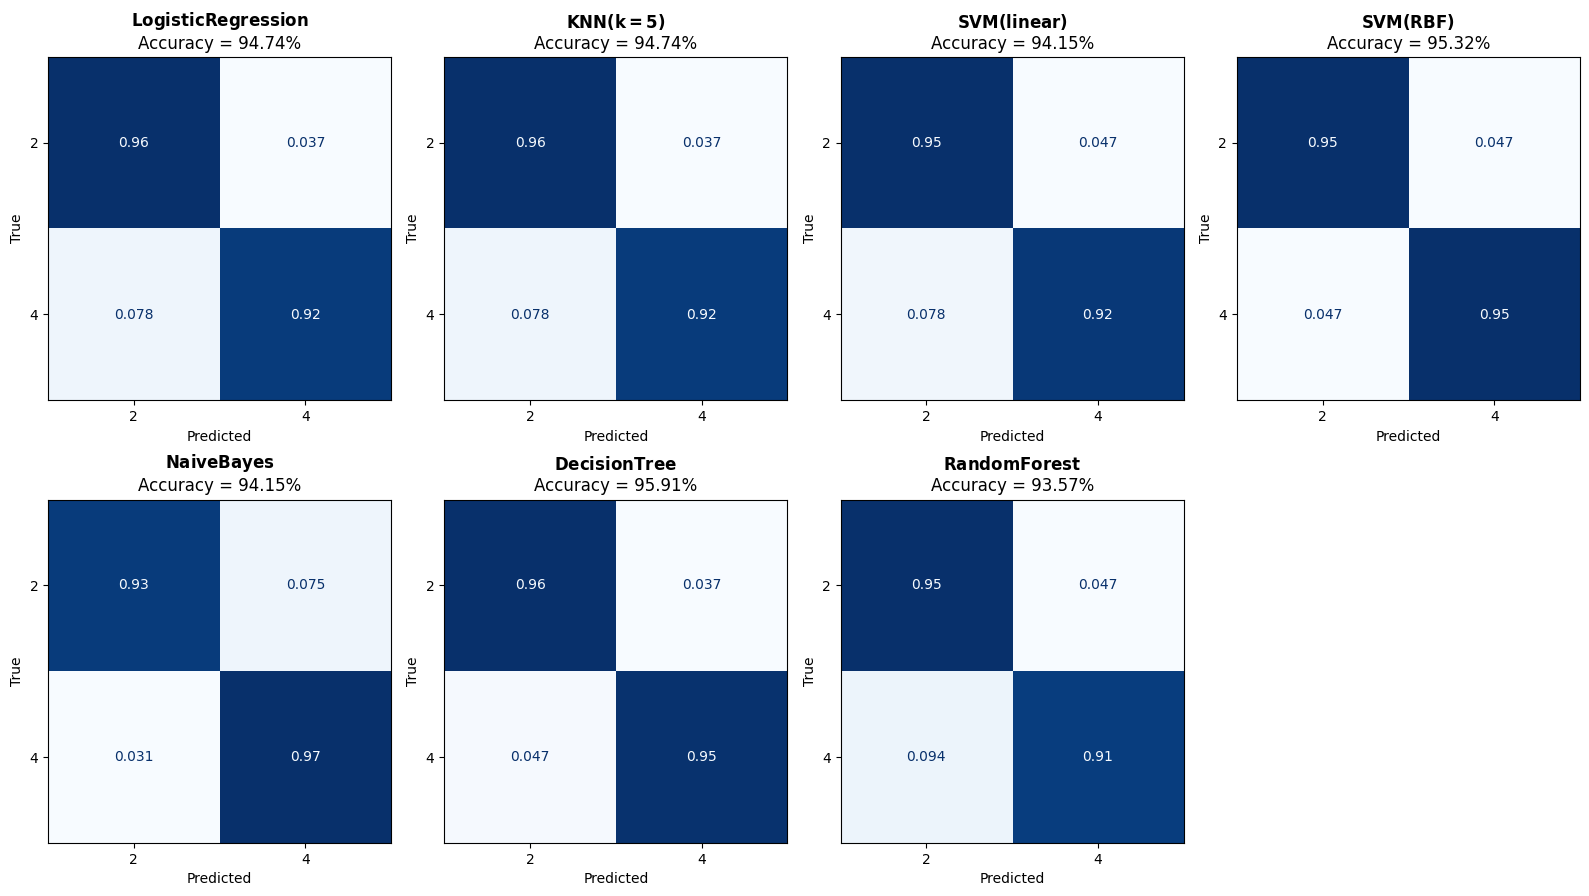

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# -------------------
# Load data
# -------------------
dataset = pd.read_csv("test_datasets/Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# -------------------
# Define models
# -------------------
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, max_iter=1000)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)),
    ("SVM (linear)", SVC(kernel="linear", random_state=0)),
    ("SVM (RBF)", SVC(kernel="rbf", random_state=0)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(criterion="entropy", random_state=0)),
    (
        "Random Forest",
        RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    ),
]

# -------------------
# Plot confusion matrices in a grid
# -------------------
n_models = len(models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4.5 * n_rows))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    ax = axes[i]

    model.fit(X_train, y_train)

    # Accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, ax=ax, cmap=plt.cm.Blues, normalize="true", colorbar=False
    )
    ax.set_title(rf"$\bf{{{name}}}$" + f"\nAccuracy = {acc:.2%}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Remove empty subplits
for j in range(n_models, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()